In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('Bank_Churn Dataset _ TF.csv')

In [4]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


In [5]:
type(df.columns)

pandas.core.indexes.base.Index

In [6]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.groupby('Geography')[['Age', 'Tenure', 'Balance']].agg({'mean', 'median'}).sort_values(by=('Age', 'mean'))

Age           Tenure               Balance           
                mean median      mean median           mean     median
Geography                                                             
France     37.615119   37.0  5.027554    5.0   37352.477370       0.00
Spain      37.922579   37.0  5.041974    5.0   39795.734545       0.00
Germany    39.729209   39.0  4.978125    5.0  121235.738547  122028.65

In [10]:
#df.groupby('Geography')[['Age', 'Tenure']].mean().plot(kind = 'bar')

<Axes: title={'center': 'Histogram'}, ylabel='Frequency'>

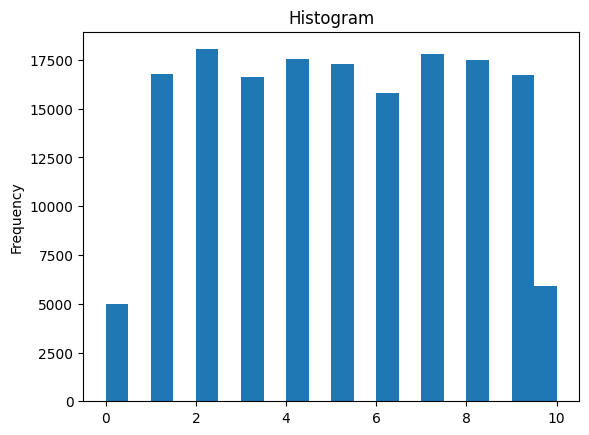

In [11]:
df['Tenure'].plot(kind = 'hist', bins = 20, title = 'Histogram')

<Axes: xlabel='CreditScore', ylabel='Balance'>

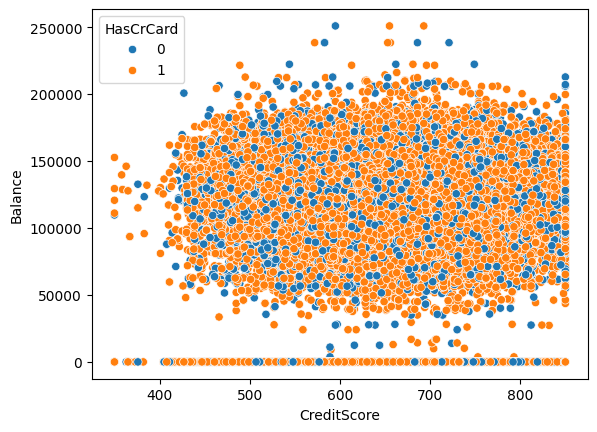

In [12]:
sns.scatterplot(x = 'CreditScore', y = 'Balance', hue = 'HasCrCard', data = df)

**Prep for Plots**

In [13]:
def num_columns(df):
    return df.select_dtypes(include = ['number']).columns.to_list()

In [14]:
numeric_columns = num_columns(df)

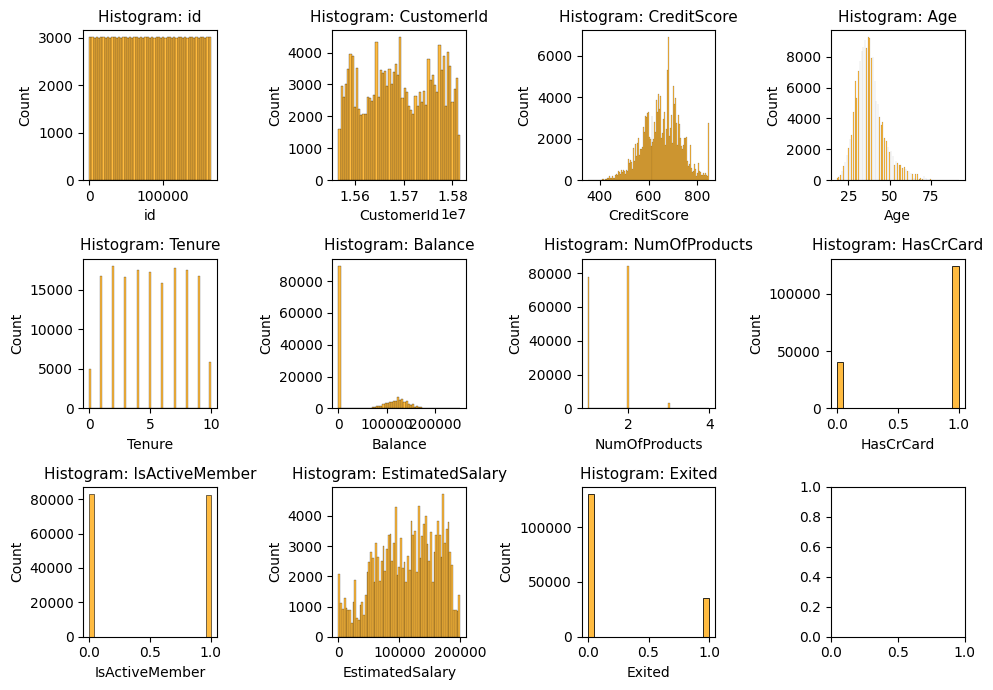

In [15]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (10,7))

for i in range(len(numeric_columns)):
    row = i // 4
    col = i % 4
    sns.histplot(x=numeric_columns[i], data=df, ax=ax[row, col], color = 'orange')
    ax[row, col].set_title(f'Histogram: {numeric_columns[i]}', fontsize=11)

plt.tight_layout()
plt.show()


**Prep for Modelling**

In [16]:
df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)

In [17]:
df = pd.get_dummies(df, columns  = ['Geography', 'Gender'], drop_first=True)

In [18]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1,0,181449.97,0,False,False,True
1,627,33.0,1,0.00,2,1,1,49503.50,0,False,False,True
2,678,40.0,10,0.00,2,1,0,184866.69,0,False,False,True
3,581,34.0,2,148882.54,1,1,1,84560.88,0,False,False,True
4,716,33.0,5,0.00,2,1,1,15068.83,0,False,True,True


**Data Prep for Models**

In [19]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

In [21]:
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

In [22]:
len(X_train), len(X_temp), len(X_valid), len(X_test)

(99020, 66014, 33007, 33007)

**Machine Learning Models**

In [23]:
model_Gaussian = GaussianNB()
model_Gaussian.fit(X_train, y_train)
y_pred = model_Gaussian.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     26114
           1       0.53      0.20      0.29      6893

    accuracy                           0.80     33007
   macro avg       0.67      0.57      0.58     33007
weighted avg       0.76      0.80      0.76     33007



In [24]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     26114
           1       0.47      0.13      0.21      6893

    accuracy                           0.79     33007
   macro avg       0.64      0.55      0.54     33007
weighted avg       0.74      0.79      0.74     33007



In [25]:
model_kNN = KNeighborsClassifier()
model_kNN.fit(X_train, y_train)
y_pred = model_kNN.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     26114
           1       0.30      0.11      0.16      6893

    accuracy                           0.76     33007
   macro avg       0.55      0.52      0.51     33007
weighted avg       0.69      0.76      0.71     33007



In [26]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     26114
           1       0.52      0.54      0.53      6893

    accuracy                           0.80     33007
   macro avg       0.70      0.71      0.70     33007
weighted avg       0.80      0.80      0.80     33007



**Hyperparameter Tuning**

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model_DT, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
model_DT_best = DecisionTreeClassifier(**best_params)
model_DT_best.fit(X_train, y_train)

# Make predictions
y_pred = model_DT_best.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     26114
           1       0.71      0.55      0.62      6893

    accuracy                           0.86     33007
   macro avg       0.80      0.75      0.77     33007
weighted avg       0.85      0.86      0.85     33007



In [29]:
best_params

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

**Brute Force/Nested Loop approach to find the best parameters**

In [30]:
best_accuracy = 0
best_params_manual = {}

for max_depth in [None, 10, 30, 50]:
    for min_samples_split in [2, 10, 20]:
        for min_samples_leaf in [1, 2, 4, 6]:
            # Create Decision Tree classifier
            dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            dt.fit(X_train, y_train)
            y_pred = dt.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params_manual = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

print("Best Parameters:", best_params_manual)
print("Best Accuracy:", best_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4}
Best Accuracy: 0.8593025721816584
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     26114
           1       0.63      0.53      0.58      6893

    accuracy                           0.84     33007
   macro avg       0.76      0.73      0.74     33007
weighted avg       0.83      0.84      0.83     33007



In [31]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     26114
           1       0.72      0.54      0.62      6893

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.77     33007
weighted avg       0.85      0.86      0.85     33007



**Neural Network Model using TensorFlow**

Data Pre-processing for Neural-Net Model

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_valid = np.asarray(X_valid).astype('float32')
y_valid = np.asarray(y_valid).astype('float32')

X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [45]:
#X_test_scaled

In [34]:
X_train_scaled.shape

(99020, 11)

**Training NN model with different Hyperparameters**

In [35]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [36]:
def get_best_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1)
    ])

    nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = nn_model.fit(X_train, y_train, batch_size = batch_size, epochs = 100, validation_split = 0.25, verbose = 0)
    return nn_model, history

In [43]:
least_loss_model = None
least_value_loss = float('inf')

for num_nodes in [12, 32, 64]:
    for dropout_prob in [0, 0.1, 0.3]:
        for learning_rate in [0.001, 0.005, 0.1]:
            for batch_size in [32, 64, 128]:
                nn_model, history = get_best_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size)
                value_loss = nn_model.evaluate(X_valid, y_valid)[0]
                if value_loss < least_value_loss:
                    least_loss_model = nn_model
                    least_value_loss = value_loss

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.7888 - loss: 3.4037
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.7885 - loss: 3.4091
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.7888 - loss: 3.4037
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.7888 - loss: 3.4037
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.2112 - loss: 12.5758
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.7888 - loss: 3.4037
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.7888 - loss: 3.4037
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.7888 - loss: 3.4037
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.7888 - loss: 3.4037
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step - accuracy: 0.7888 - loss: 3.4037
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - accuracy: 0.7888 - loss: 3.4037
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.7888 - loss: 3.4037
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - accu

In [44]:
least_loss_model

<Sequential name=sequential_2, built=True>

In [51]:
predictions = least_loss_model.predict(X_test)
predicted_classes = (predictions > 0.5).astype("int32")

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


In [54]:
accuracy = accuracy_score(y_test, predicted_classes)
conf_matrix = confusion_matrix(y_test, predicted_classes)

In [55]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7911655103462902
Confusion Matrix:
[[26114     0]
 [ 6893     0]]


In [62]:
def MSE_func(y_pred, y_actual):
    temp = np.square(y_pred - y_actual).mean()
    return temp 

y_pred_nn = least_loss_model.predict(X_test)

MSE_nn_model = MSE_func(y_pred_nn, y_test)
print(f'mean squared model of Neural net model : {MSE_nn_model}')

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step
mean squared model of Neural net model : 30142534.0
